#### Data Science project
#### Question 
+ Predict if a patient will live or die based on parameters using machine learning 
#### Workflow
+ Data preparation
+ EDA 
+ Feature selection
+ Build model
+ Serialization
+ Production with StreamLit or Flask 


In [1]:
#Load our EDA packages
import pandas as pd 
import numpy as np 

In [2]:
# Load Dada Visualisation packages 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df = pd.read_csv("data/hepatitis.data")

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes


In [4]:
#Preview the first data row
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [5]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN" ,"ALK PHOSPHATE","SGOT","ALBUMIN" ,
    "PROTIME","HISTOLOGY"  ]

In [6]:
df = pd.read_csv("data/hepatitis.data",names=col_names)

In [7]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [8]:
#Cleaning our data 
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [9]:
#convert column names to lowercase
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [11]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [12]:
#data types 
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [13]:
#replace ? with the value zero for semantic reasoning
df = df.replace('?',0)

In [14]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [15]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [16]:
#how many columns contain elements of type object
sum(df.dtypes == 'object')

15

In [17]:
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [18]:
#Casting and converting from one data type to another 
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [19]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [20]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

In [21]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

#### Narative 
+ Most of the date were in objects
+ Two of them were in float 


In [22]:
#### Count for each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [23]:
# Shape of the dataset 
df.shape

(155, 20)

In [24]:
## sheck for missing values 
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

#### EDA
+ Descriptive analytics 


In [25]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [26]:
tarjet_label = {"Die":1,"Live":2}

In [27]:
# Value counts
df['class'].value_counts()


2    123
1     32
Name: class, dtype: int64

<AxesSubplot:>

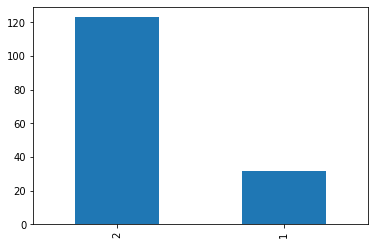

In [28]:
# Plot of count
df['class'].value_counts().plot(kind = 'bar')

In [29]:
### How many cases classified by males(1) and females(2) 
df['sex'].unique()

array([2, 1], dtype=int64)

In [30]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:>

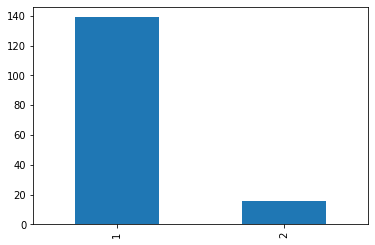

In [31]:
df['sex'].value_counts().plot(kind = 'bar')

#### Narative 
+ There are far more males tha females in this dataset

In [32]:
### Grouping different age ranges
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

#### The previous result is not very informative 
#### Therefore, build distribution table using the age range

In [33]:
df['age'].max()

78

In [34]:
df['age'].min()

7

In [35]:
labels = ["Less than 10", "10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins = bins , labels = labels)).size()

In [36]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [37]:
freq_df = freq_df.reset_index(name = 'count')

In [38]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


<AxesSubplot:>

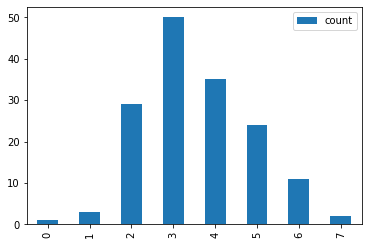

In [39]:
freq_df.plot(kind ='bar')

<AxesSubplot:>

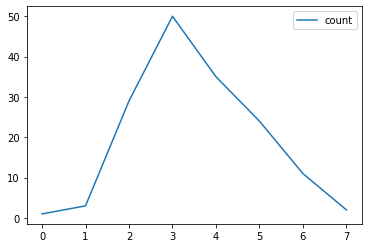

In [40]:
freq_df.plot(kind ='line')

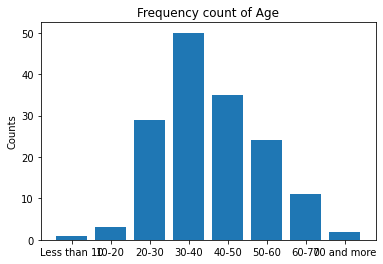

In [41]:
# Plot of the frequency table -- fixed
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency count of Age')
plt.show()

#### Narative 
+ Highest prevalence of Hepatitis is from 30-40 followed by 40-50
+ The least affected individuals are under 10 and above 70

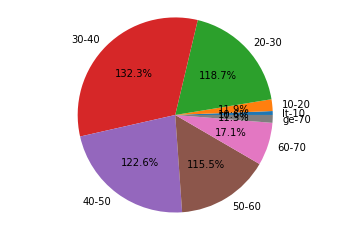

In [42]:
# Pie chart 
labels = ['lt-10','10-20','20-30','30-40','40-50','50-60','60-70','ge-70']
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### Checking for outliners  
+ Univariate analyisis
+ Multivariate analysis 
#### Methods 
+ Box plot
+ Scatterplot (Mutli)
+ Z-score
+ IQR Interquartile Range 

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Using Boxplot for Univariate Outliner Detection
import seaborn as sns 

<AxesSubplot:xlabel='age'>

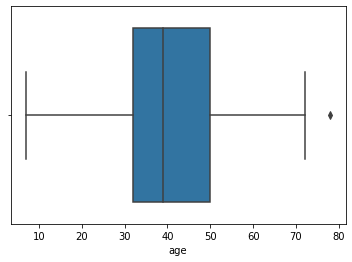

In [45]:
sns.boxplot(df['age'])

In [46]:
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


<AxesSubplot:xlabel='steroid'>

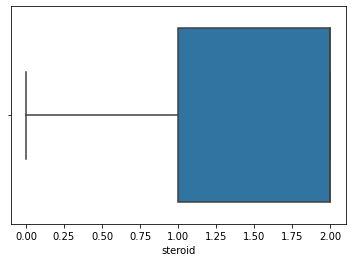

In [47]:
# using boxplot for outliner detection
sns.boxplot(df['steroid'])

<AxesSubplot:xlabel='alk_phosphate'>

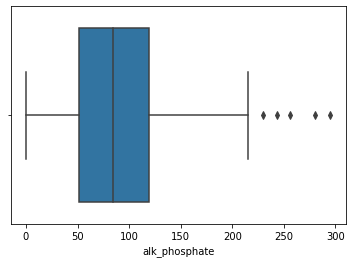

In [48]:
sns.boxplot(df['alk_phosphate'])

<AxesSubplot:xlabel='age', ylabel='albumin'>

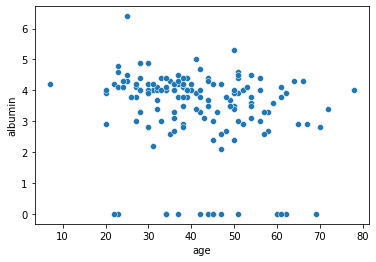

In [49]:
# Scatterplot 
sns.scatterplot(df['age'],df['albumin'])

<AxesSubplot:xlabel='age', ylabel='albumin'>

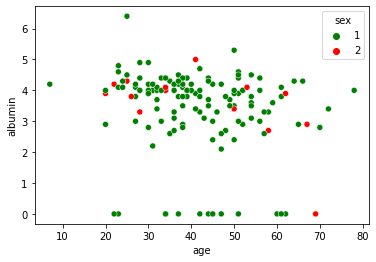

In [153]:
# Scatter plot 
sns.scatterplot(x=df['age'],y=df['albumin'],hue=df['sex'],palette=['green','red'],data=df)

#### using Interquartile range (IQR)
+ H-Spread/ Mid-Spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)


In [51]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

In [52]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [53]:
### Get the actual datapoint that is an outliner 
(df < (q1 - 1.5 * IQR )) | (df > (q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### Narative
+ The data points with true are the outliner 
##### Solution 
+ Remove 
+ Change 
+ Ignore 

In [54]:
df_no_outliner = df[~((df < (q1 - 1.5 * IQR )) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
df_no_outliner

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [56]:
print(df.shape)
print(df_no_outliner.shape)

(155, 20)
(43, 20)


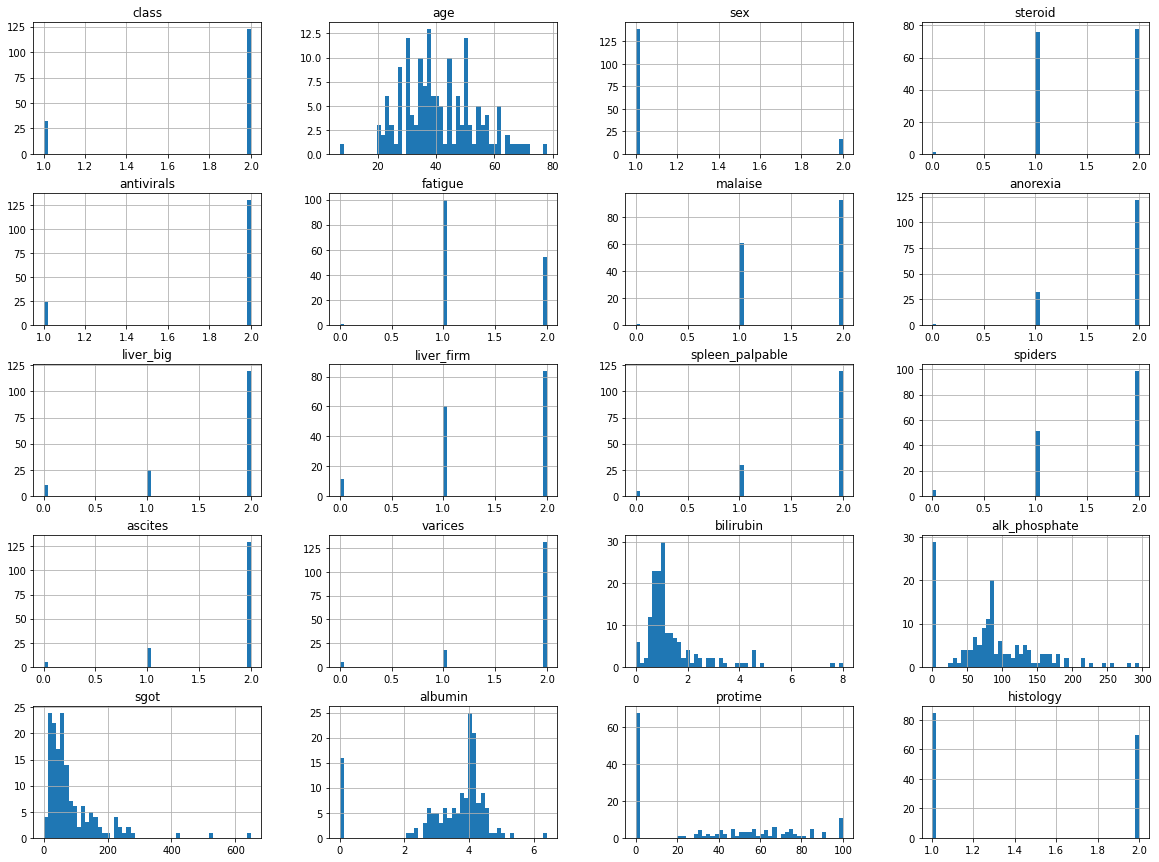

In [57]:
### Plot of distribution of data 
df.hist(bins =50 , figsize = (20,15))
plt.show()

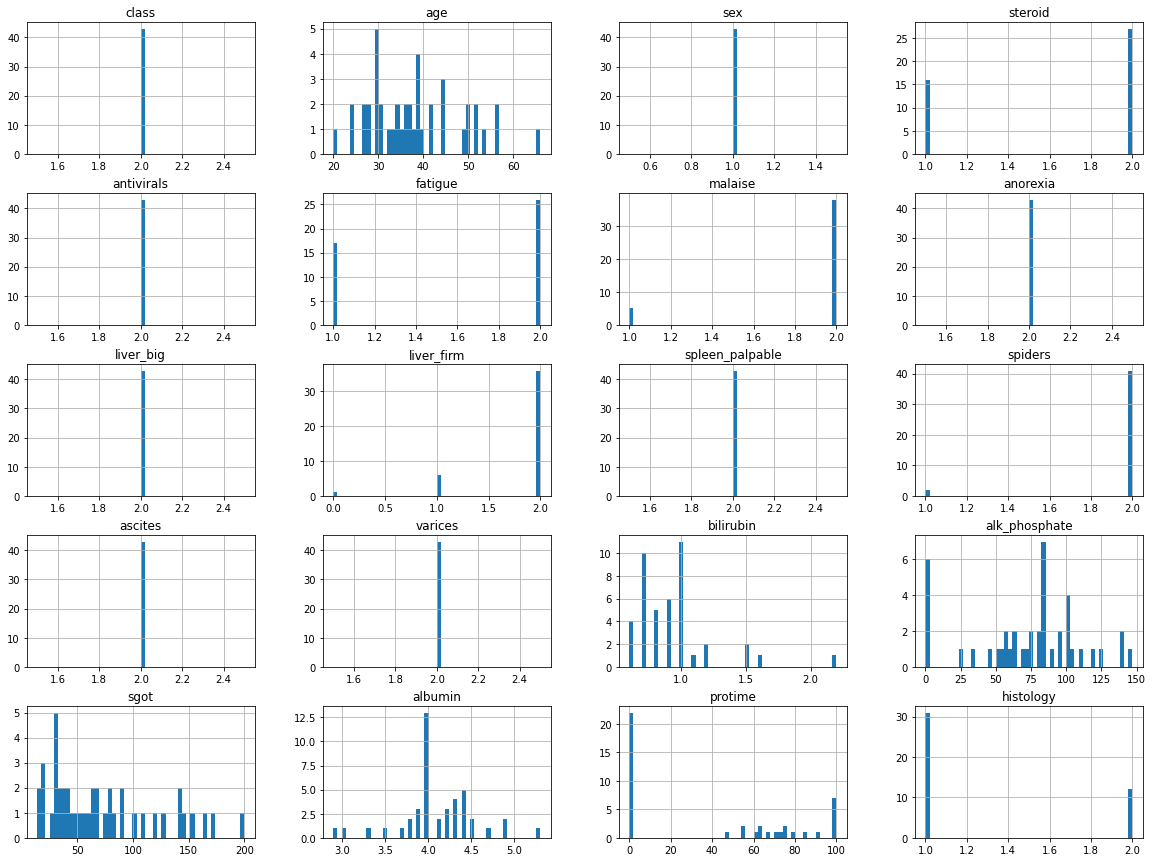

In [58]:
### Plot of distribution of data 
df_no_outliner.hist(bins =50 , figsize = (20,15))
plt.show()

#### Feature Selection and Importance
+ SelectKbest 
     - Strong relation with the output/target
+ Recursive Feature Elimination

In [59]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [60]:
# Features and labels 
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [61]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [62]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df[['class']] 

In [63]:
# using Skbest 
skb = SelectKBest(score_func= chi2, k = 10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [64]:
# Highest score shows the best fit 
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [65]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [66]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [67]:
# Mapping to Feature Name 
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [68]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [69]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [70]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [71]:
# Get the best 
# The highest the number , the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [72]:
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [73]:
type(best_feat_df.nlargest(12,'Feature_Scores'))

pandas.core.frame.DataFrame

In [74]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### Recursive Feature Elimination

In [75]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

In [76]:
logit = LogisticRegression()

In [77]:
rfe = RFE(logit,step = 8)

In [78]:
rfe_fit = rfe.fit(xfeatures,ylabels)

In [79]:
#Selection 
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['Ranking_Features'])

In [80]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis = 1)

In [81]:
rfe_feature_df

,Feature_name,Selected_Features,Ranking_Features
0,age,False,3
1,sex,True,1
2,steroid,False,2
3,antivirals,False,3
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,2
8,liver_firm,False,3
9,spleen_palpable,False,3


### Narative
+ RFE we will eliminate the lowest rating or those of the value TRUE

#### Checking for Feature Importance 
+ ExtraTreesClassifier
+ Which feature is important

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [84]:
# Print Import
print(et_clf.feature_importances_)

[0.04827847 0.02285864 0.02872997 0.01120962 0.02519382 0.05054869
 0.02375137 0.04011423 0.0554346  0.03537239 0.07560975 0.08973328
 0.05844334 0.09784231 0.07061222 0.05739227 0.07829684 0.06541777
 0.06516043]


In [85]:
feature_importance_df = pd.Series(et_clf.feature_importances_,index= xfeatures.columns)

In [86]:
feature_importance_df 

age                0.048278
sex                0.022859
steroid            0.028730
antivirals         0.011210
fatigue            0.025194
malaise            0.050549
anorexia           0.023751
liver_big          0.040114
liver_firm         0.055435
spleen_palpable    0.035372
spiders            0.075610
ascites            0.089733
varices            0.058443
bilirubin          0.097842
alk_phosphate      0.070612
sgot               0.057392
albumin            0.078297
protime            0.065418
histology          0.065160
dtype: float64

<AxesSubplot:>

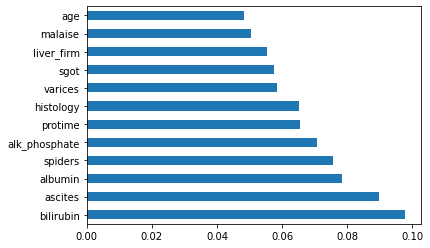

In [87]:
feature_importance_df.nlargest(12).plot(kind='barh')

#### Narrative 
+ All the methods gave us almost the same features to use 

In [88]:
#Correlation 
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


<AxesSubplot:>

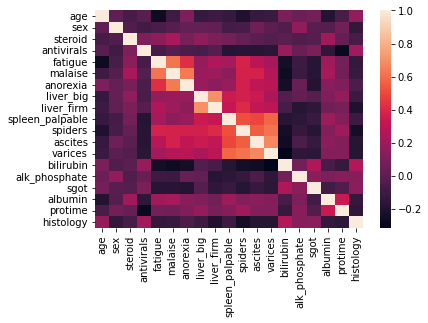

In [89]:
# Heatmap for Correlation
sns.heatmap(xfeatures.corr())

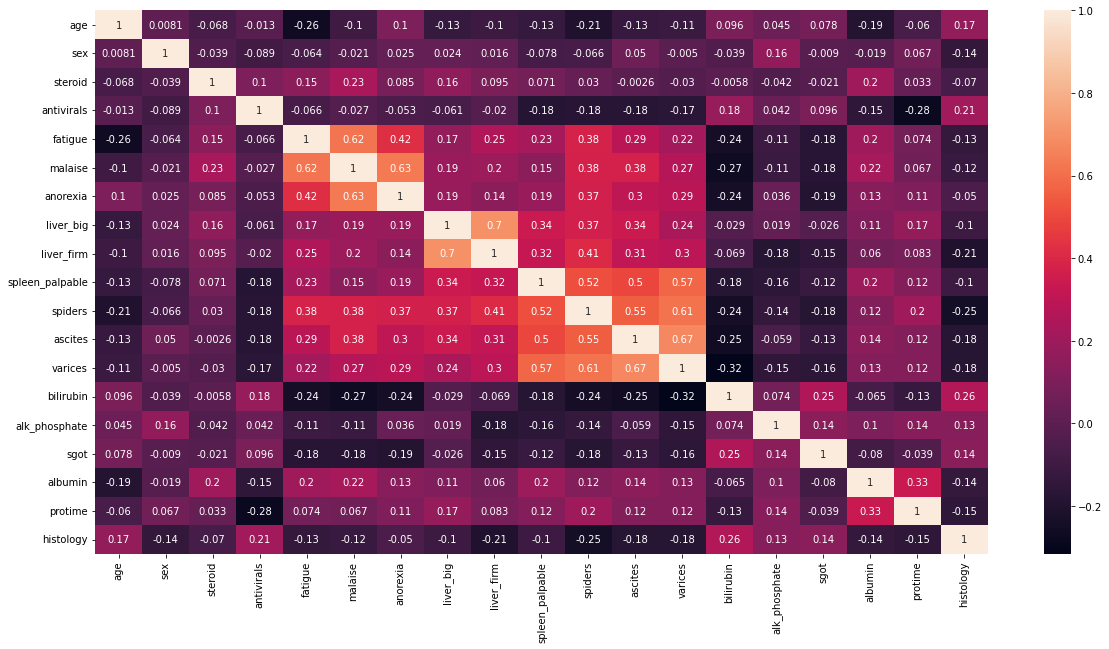

In [90]:
# Heatmap for Correlation with annotations 
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot = True )
plt.show()

### Model Building 
+ Feature and Labels
+ Train / Test /Split
+ Logostic Regression
+ RF
+ DCT
+ Serialize 

In [91]:
# Machine Learning package
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [92]:
# Features for Initial Data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [93]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [94]:
ylabels = df['class']

In [95]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [96]:
# Train/ test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

In [97]:
# Train/ test dataset for best features
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=7)

In [98]:
 # Buildong Model 
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [99]:
#Model Accuracy  
logreg.score(x_test,y_test)

0.723404255319149

In [100]:
# Method 2 
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [101]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [102]:
accuracy_score(y_test,logreg.predict(x_test))

0.723404255319149

In [103]:
# Building model 
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

LogisticRegression()

In [104]:
#Model Accuracy 
#Method 1 
model_logit.score(x_test_b,y_test_b)

0.723404255319149

### Single Prediction 
x_test.iloc[1]

In [105]:
res_dic = {"Die" : 1,"Live" : 2}
x1 = x_test.iloc[1]

In [106]:
# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([2], dtype=int64)

### Alternative algorithms

In [107]:
clf = DecisionTreeClassifier() 

In [108]:
# Fit 
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier()

In [109]:
# Model Accuracy score 
clf.score(x_test_b,y_test_b)

0.7659574468085106

In [110]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier(n_neighbors=3)

In [112]:
# Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [113]:
# Model Accuracy Score 
knn.score(x_test_b,y_test_b)

0.7446808510638298

### Save Our Model 
+ Serialization
+ Pickle
+ Joblib
+ numpy/json/ray

In [114]:
# Using Joblib
import joblib

In [115]:
model_file = open("logistic_regression_hepB_model.pkl","wb")
joblib.dump(model_logit,model_file)
model_file.close()

In [116]:
model_file_knn = open("knn_hepB_model.pkl","wb")
joblib.dump(knn,model_file_knn)
model_file_knn.close()

In [117]:
model_file_clf = open("decision_tree_clf_hepB_model.pkl","wb")
joblib.dump(clf,model_file_clf)
model_file_clf.close()

In [118]:
# Create decision Tree Plot 
from IPython.display import Image
from sklearn import tree
import pydotplus

In [119]:
feature_names_best = xfeatures_best.columns

In [120]:
target_names = ["Die","Live"]

In [121]:
# Create a Dot Plot
dot_data = tree.export_graphviz (clf,out_file = None , feature_names= feature_names_best, class_names=target_names)

In [122]:
# Draw a graph 
graph = pydotplus.graph_from_dot_data(dot_data)

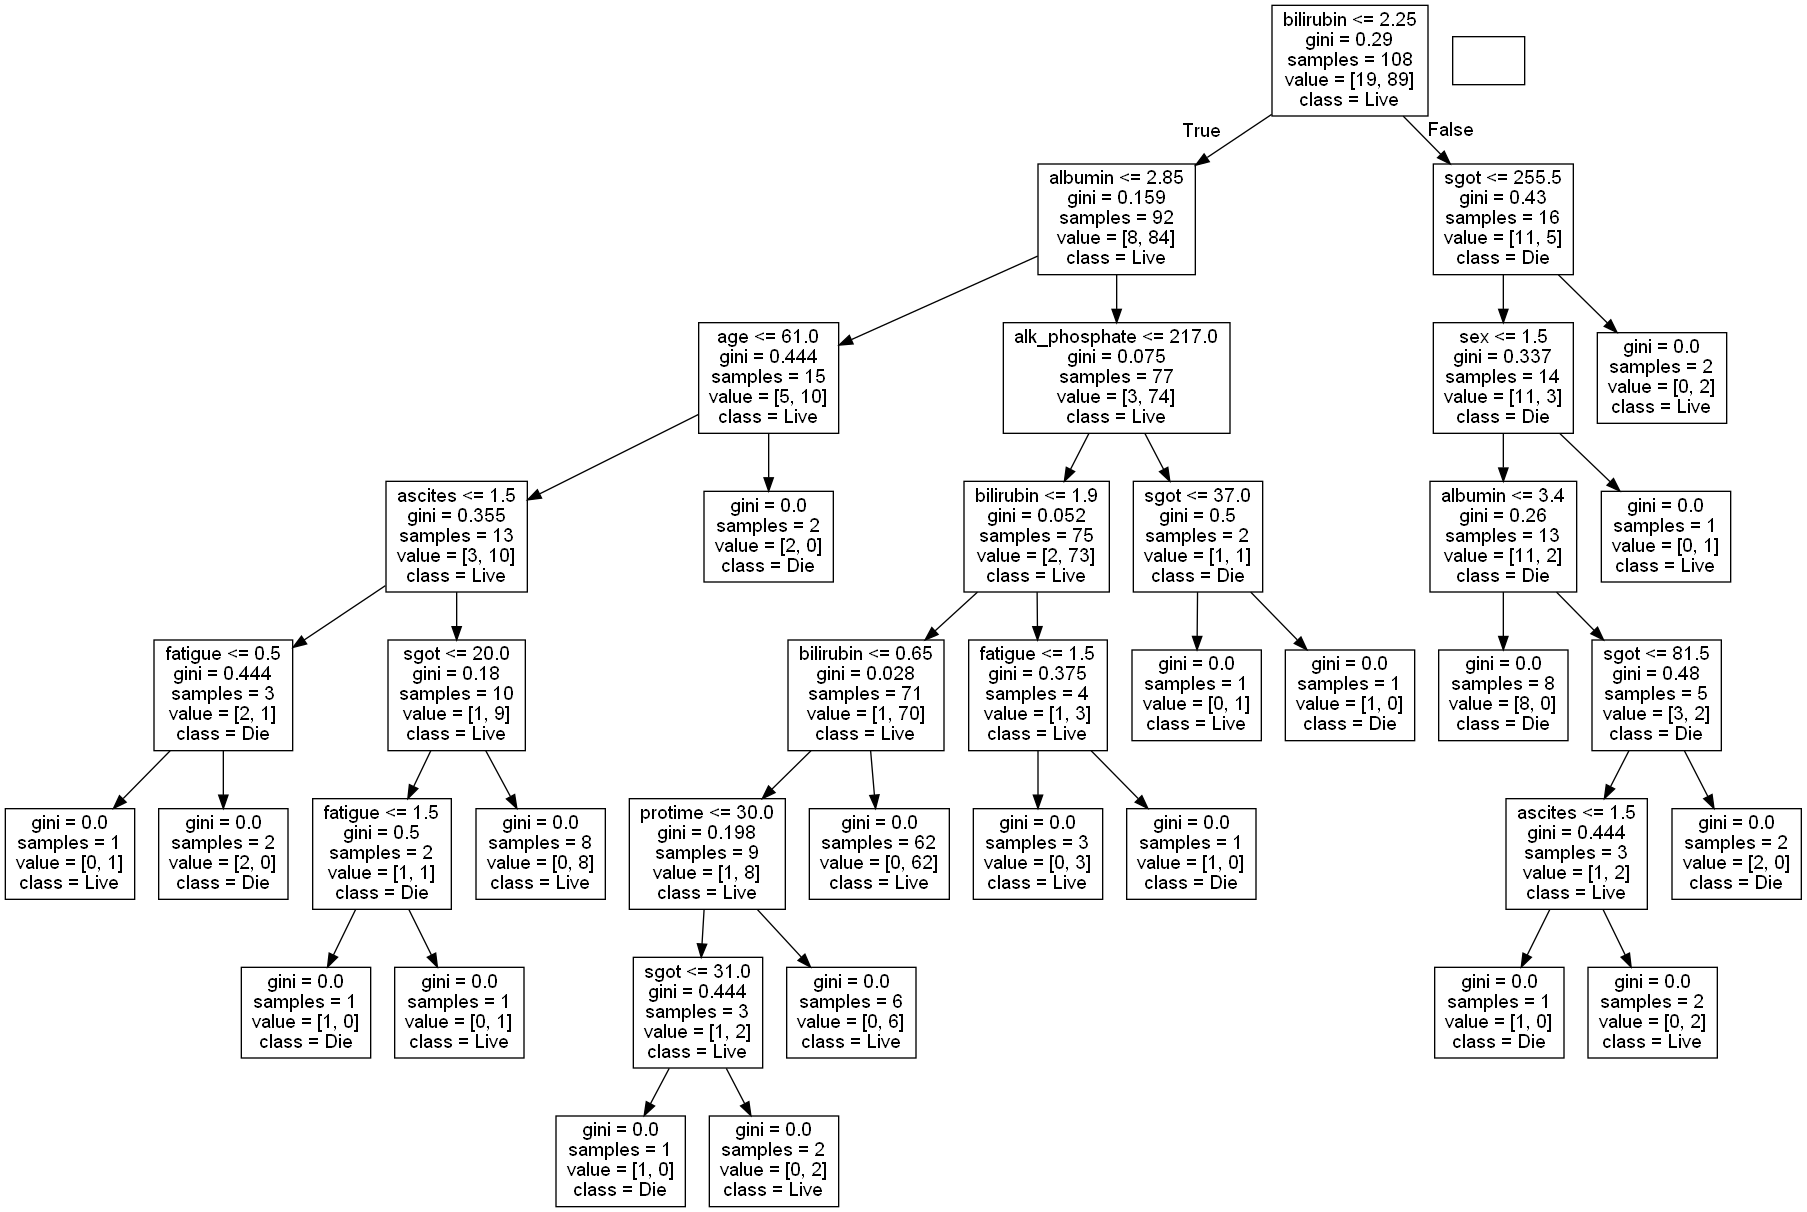

In [123]:
Image(graph.create_png())

In [124]:
#Save the plot 
graph.write_png("hep_decision_tree_plot.png")

True

### Interpret model and evaluate 
+ Eli5
+ Lime
+ SHAP
+ Skater

In [125]:
# interpreting with Lime
import lime 
import lime.lime_tabular

In [126]:
# Methods and Attributes 
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

# Create lime Explainer 
+ LimeTabularExplainer = Tables
+ LimeTextEplainer = Text
+ LimeImageExplainer = Images

In [127]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [128]:
target_names

['Die', 'Live']

In [129]:
class_names = ["Die(1)","Live(2)"]

In [130]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,feature_names = feature_names_best,class_names = class_names , discretize_continuous=True)

In [131]:
x1

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [132]:
model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

array([2], dtype=int64)

In [133]:
exp = explainer.explain_instance(x_test_b.iloc[1],model_logit.predict_proba,num_features = 14 , top_labels = 1)

In [134]:
exp.show_in_notebook(show_table=True,show_all=False)

In [135]:
# Explanation as list 
exp.as_list()

[('bilirubin > 1.50', -0.4190506865816081),
 ('sex <= 1.00', -0.22106937321249592),
 ('spiders <= 1.00', -0.1421727532302444),
 ('histology <= 1.00', 0.11004969773477383),
 ('sgot > 90.50', 0.10130396402212437),
 ('alk_phosphate > 119.25', -0.10120709433752763),
 ('age > 50.25', -0.05967889847763909),
 ('2.98 < albumin <= 4.00', 0.04838868732519039),
 ('1.50 < steroid <= 2.00', 0.045147483462268),
 ('protime <= 0.00', 0.04449573170153983),
 ('fatigue <= 1.00', 0.037773472118095945),
 ('antivirals <= 2.00', 0.0),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

### Using Eli5

In [136]:
import eli5

In [137]:
# Show how each feature contributes
eli5.show_weights(model_logit, top = 10)

In [138]:
feature_names_best = ['sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate','<BIAS>', 'sgot', 'albumin', 'protime',
       'histology']

In [139]:
# Show how each feature contributes
eli5.show_weights(model_logit,feature_names = feature_names_best , target_names = class_names, top =10)

In [140]:
# Show how each feature contributes
eli5.show_prediction(model_logit,x_test_b.iloc[1], feature_names = feature_names_best , target_names = class_names , top =10)

##### Evaluation of Model 
+ Confusion Matrix
+ Classification Report
+ Accuracy core 

![](confusionmatrix_image.jpg)

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
y_pred = model_logit.predict(x_test_b)

In [143]:
# Accuracy score 
accuracy_score(y_test,y_pred)

0.723404255319149

In [144]:
# Using confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 2, 11],
       [ 2, 32]], dtype=int64)

In [145]:
# Plot 
from sklearn.metrics import plot_confusion_matrix

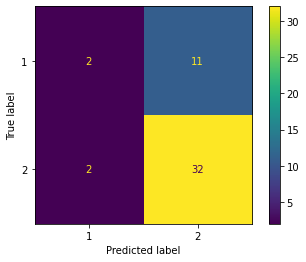

In [146]:
plot_confusion_matrix(model_logit,x_test_b,y_test_b)

In [147]:
tp , tf , fn , tn = confusion_matrix(y_test,y_pred).ravel()

In [148]:
tp

2

In [149]:
### Classification report 
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [151]:
class_names

['Die(1)', 'Live(2)']

In [152]:
print(classification_report(y_test,y_pred,target_names = class_names))

              precision    recall  f1-score   support

      Die(1)       0.50      0.15      0.24        13
     Live(2)       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47

